# Explicit method


$$$$

### Heat equation: metal heated in the middle

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# This is for 3D visualisation
from mpl_toolkits.mplot3d import Axes3D

### 1. Domain Definition (grid creation):

In [2]:
# Steps

k = 0.025 # Time step -> delta_t
h = 0.025 # Step size -> delta_x

# Diffusion coefficient:
c_2 = 2.

# Define the r factor
r_factor = c_2*k/h**2
print(r_factor)

39.99999999999999


In [3]:
# Limit for the spatial vector
a = 1.0

# Limit for the time vector
b = 0.1

# Axes
# Spatial axis
x = np.arange(0., a + h , h)

# Time axis, rounding it to 3 figs. is for plotting only
t = np.arange(0., b + k , k).round(3)

print(x.shape)
print(t.shape)

(41,)
(9,)


### 2. Set up ICs/BCs:

In [4]:
# Initial conditions
ics = np.sin(np.pi*x) # this is the initial T at t=0

# Boundary Conditions 
bcs = [0., 0.] # T = 0 at x=0, and x=a

### 3. Create an empty solution (sln) matrix for $T(x,t)$

In [5]:
# Matrix T
n = len(x)
m = len(t)
#print(n, m)

# Empty matrix with the correct size
T = np.zeros((n, m))

print(T.shape)

(41, 9)


### 4. Fill up the matrix elements with the ICs/BCs:

In [6]:
# Fill up the initial conditions
T[:, 0] = ics

# Fill up the boundary conditions
T[0 , :] = bcs[0]
T[-1, :] = bcs[1]

#print(T.round(4).T)

### 5. Fill up the inner elements of the matrix using our explicit formula:

$$T_{i, j+1} = (1-2r)T_{i,j} + r(T_{i-1,j}+T_{i+1,j})$$

In [7]:
# outler loop (time loop -> index j)

for j in range(1, m): # From 1 as we already have the ICs
    
    # inner loop (spatial loop -> index i)
    
    for i in range(1, n - 1): # From 1 to n-1 as we already have the BCs set
        
        T[i, j] = (1 - 2*r_factor)*T[i, j-1] + r_factor*(T[i-1, j-1] + T[i+1, j-1])
        

In [8]:
#print(T.round(3).T)

### 6. Plotting your solutions for $T(x,t)$

#### A. Temperature vs. Positon space:

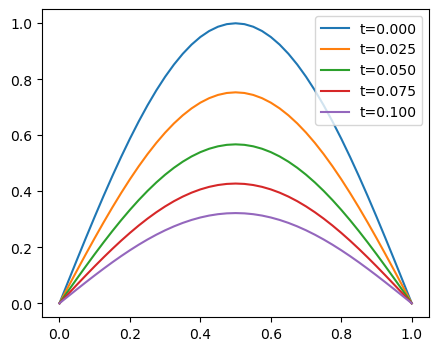

In [9]:
# Fig environment

plt.figure(figsize=(5,4))

plt.plot(x, T[:, 0], label = 't=0.000')

plt.plot(x, T[:, 1], label = 't=0.025')

plt.plot(x, T[:, 2], label = 't=0.050')

plt.plot(x, T[:, 3], label = 't=0.075')

plt.plot(x, T[:, 4], label = 't=0.100')

plt.legend()

plt.show()

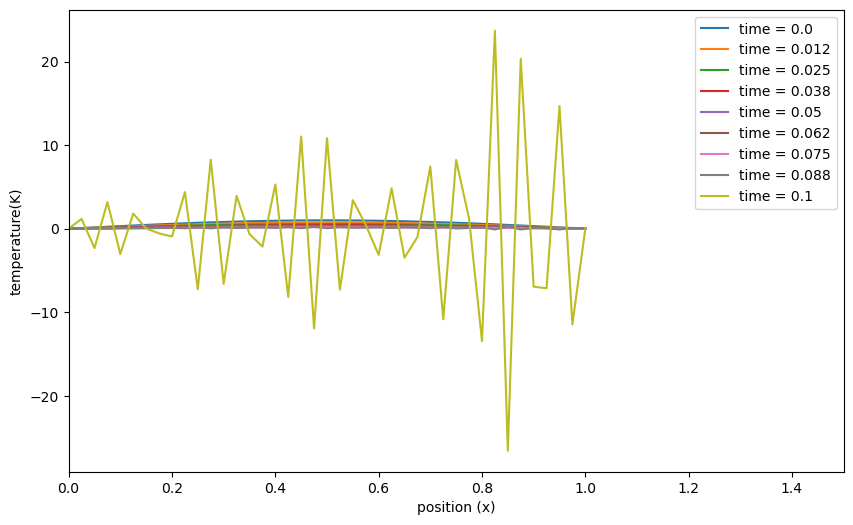

In [10]:
plt.figure(figsize=(10,6))

for j in range(m):
    plt.plot(x, T[:, j])

plt.xlim(0,1.5)

plt.xlabel("position (x)")
plt.ylabel("temperature(K)")
    
plt.legend([f'time = {time_value}' for time_value in t], loc=1)
plt.show()

#### B. Maximum temperature vs. time.

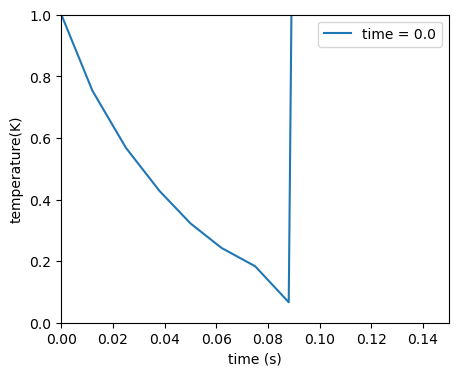

In [11]:
plt.figure(figsize=(5,4))

plt.plot(t, T[int(x.shape[0])//2 , :])

plt.xlim(0,0.15)
plt.ylim(0,1)

plt.xlabel("time (s)")
plt.ylabel("temperature(K)")
    
plt.legend([f'time = {time_value}' for time_value in t], loc=1)
plt.show()

#### C. Temperature surface projection:

In [12]:
# Create 2D grid using meshgrid
x_grid, t_grid = np.meshgrid(x, t)

print(x_grid.shape, t_grid.shape, T.T.shape)

(9, 41) (9, 41) (9, 41)


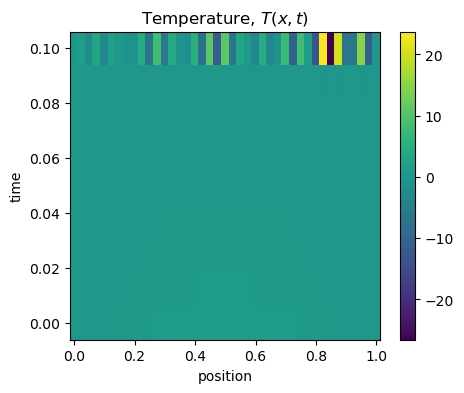

In [13]:
plt.figure(figsize=(5,4))

# Surface
z_temp = plt.pcolor(x_grid, t_grid, T.T, cmap = 'viridis')

plt.xlabel("position")

plt.ylabel("time")

plt.title("Temperature, $T(x, t)$")

plt.colorbar(z_temp)

plt.show()

#### D. Temperature surface rendering:

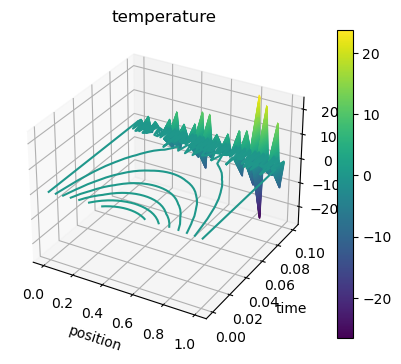

In [14]:
plt.figure(figsize=(5,4))

ax  = plt.axes(projection='3d')

ax.contour3D(x_grid, t_grid, T.T, 500, cmap = 'viridis')

plt.xlabel("position")
plt.ylabel("time")

plt.title("temperature")

plt.colorbar(z_temp, ax=ax)

plt.show()